In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [327]:
data = pd.read_csv('bank-full.csv')

In [328]:
len(data.columns)

17

In [329]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [330]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [331]:
data.replace(' ', np.nan, regex=True, inplace=True)
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [332]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [333]:
d = {'yes':1, 'no':0}

data['default'] = data['default'].map(d)
data['housing'] = data['housing'].map(d)
data['loan'] = data['loan'].map(d)
data['y'] = data['y'].map(d)

In [334]:
data.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [335]:
mon_dict = {'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2, 'mar':3, 'apr':4, 'sep':9}

data['month'] = data['month'].map(mon_dict)

In [336]:
# encoding texual values into numbers
job = pd.get_dummies(data['job'], prefix='Job', drop_first=True)
data = pd.concat([data, job], axis=1)

marital = pd.get_dummies(data['marital'], prefix='marital', drop_first=True)
data = pd.concat([data, marital], axis=1)

education = pd.get_dummies(data['education'], prefix='education', drop_first=True)
data = pd.concat([data, education], axis=1)

contact = pd.get_dummies(data['contact'], prefix='contact', drop_first=True)
data = pd.concat([data, contact], axis=1)

poutcome = pd.get_dummies(data['poutcome'], prefix='poutcome', drop_first=True)
data = pd.concat([data, poutcome], axis=1)

In [337]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'Job_blue-collar', 'Job_entrepreneur',
       'Job_housemaid', 'Job_management', 'Job_retired', 'Job_self-employed',
       'Job_services', 'Job_student', 'Job_technician', 'Job_unemployed',
       'Job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [338]:
data.drop(columns=['job', 'marital', 'education', 'contact', 'poutcome'], inplace=True)
data.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1


In [339]:
data.isnull().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
Job_blue-collar        0
Job_entrepreneur       0
Job_housemaid          0
Job_management         0
Job_retired            0
Job_self-employed      0
Job_services           0
Job_student            0
Job_technician         0
Job_unemployed         0
Job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_telephone      0
contact_unknown        0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
dtype: int64

In [340]:
data.describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,6.144655,258.163080,2.763841,40.197828,...,0.601933,0.282896,0.513194,0.294198,0.041074,0.064276,0.287983,0.040698,0.033421,0.817478
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,2.408034,257.527812,3.098021,100.128746,...,0.489505,0.450411,0.499831,0.455687,0.198464,0.245247,0.452828,0.197592,0.179735,0.386278
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='duration', ylabel='Count'>

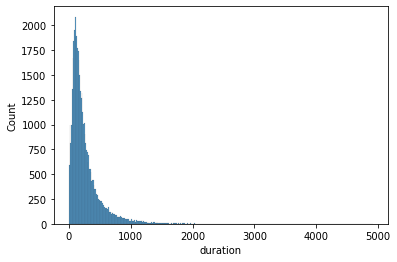

In [341]:
sns.histplot(data.duration)

In [342]:
max_thresh = data.age.quantile(0.99)
print(max_thresh)

71.0


In [343]:
data = data[data.age < max_thresh]

In [344]:
data.reset_index(inplace=True, drop=True)

In [345]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

scaled_features = sc_x.fit_transform(cont)

std_df = pd.DataFrame(data=scaled_features, columns=['age', 'balance', 'duration'])

data.drop(columns=['age', 'balance', 'duration'], inplace=True)

data = pd.concat([data, std_df], axis=1)

In [346]:
data.isnull().sum()

default                0
housing                0
loan                   0
day                    0
month                  0
campaign               0
pdays                  0
previous               0
y                      0
Job_blue-collar        0
Job_entrepreneur       0
Job_housemaid          0
Job_management         0
Job_retired            0
Job_self-employed      0
Job_services           0
Job_student            0
Job_technician         0
Job_unemployed         0
Job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_telephone      0
contact_unknown        0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
age                    0
balance                0
duration               0
dtype: int64

In [347]:
pos_rate = data[data['y']==1]['y'].count()/len(data)

print('Positive respones rate: ', pos_rate*100)

Positive respones rate:  11.338431267328504


In [348]:
y = data[['y']]
X = data.drop(columns=['y'])

In [349]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [350]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, train_size=0.7)

In [351]:
log_m1 = sm.Logit(y_train, X_train)
result = log_m1.fit()

Optimization terminated successfully.
         Current function value: 0.244702
         Iterations 8


In [352]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31306
Model:                          Logit   Df Residuals:                    31273
Method:                           MLE   Df Model:                           32
Date:                Sun, 03 Apr 2022   Pseudo R-squ.:                  0.3111
Time:                        18:24:56   Log-Likelihood:                -7660.6
converged:                       True   LL-Null:                       -11120.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3849      0.173     -8.019      0.000      -1.723      -1.046
default                -0.2054      0.204     -1.008      0.313      -0.605       0.194
housing         

In [353]:
#dropping columns having P values greater than 30. That means in a confidence intercal of 70%
X.drop(columns=['default', 'pdays', 'Job_unknown'], inplace=True)

In [354]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, train_size=0.7)

In [355]:
log_2 = sm.Logit(y_train, X_train)
result = log_2.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.244737
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31306
Model:                          Logit   Df Residuals:                    31276
Method:                           MLE   Df Model:                           29
Date:                Sun, 03 Apr 2022   Pseudo R-squ.:                  0.3110
Time:                        18:24:56   Log-Likelihood:                -7661.7
converged:                       True   LL-Null:                       -11120.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3303      0.147     -9.029      0.000      -1.619      -1.041
ho

In [356]:
y_pred = result.predict(X_test)

y_pred_df = pd.DataFrame(y_pred, columns=['Y Predicted'])

In [357]:
y_pred =y_pred.reset_index(drop=True)

In [361]:
y_test.reset_index(drop=True, inplace=True)

In [362]:
y_pred = pd.concat([y_pred, y_test], axis=1)

In [365]:
y_pred.rename(columns={0:'Y Predicted', 'y':'Y Test'}, inplace=True)
y_pred

,Y Predicted,Y Test
0,0.053514,0
1,0.048895,0
2,0.036398,0
3,0.095005,0
4,0.018371,0
...,...,...
13413,0.109672,0
13414,0.031865,0
13415,0.027517,0
13416,0.273065,0


In [370]:
y_pred[y_pred['Y Test']==0].count()

Y Predicted    11922
Y Test         11922
dtype: int64

In [371]:
y_pred.loc[y_pred['Y Predicted']>=0.5, 'Y Predicted'] = 1
y_pred.loc[y_pred['Y Predicted']<0.5, 'Y Predicted'] = 0

In [385]:
y_pred[y_pred['Y Test']==0].count()

Y Predicted    11922
Y Test         11922
dtype: int64

In [378]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred['Y Predicted'], y_pred['Y Test'])


array([[11638,  1017],
       [  284,   479]], dtype=int64)

In [384]:
print('Accuracy: ',accuracy_score(y_pred['Y Predicted'], y_pred['Y Test'])*100, '%')

Accuracy:  90.30406916082873 %
